In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
# Specify the file path
file_path = r'../../data/raw/PVTA Vehicles.xlsx'

# Load the 'Vehicle Summary from Fall 2021' sheet
df_vehicle_summary_fall_2021 = pd.read_excel(file_path, sheet_name='Vehicle Summary from Fall 2021 ', engine='openpyxl')

# Extract "Age" for each "Asset Name"
age_asset_name = df_vehicle_summary_fall_2021[['Asset Name', 'Age']]

# Optional: Set "Asset Name" as the index of the DataFrame

age_asset_name.rename(columns={'Asset Name': 'Vehicle'}, inplace=True)

# Show the result
age_asset_name

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_20440\3237622768.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_asset_name.rename(columns={'Asset Name': 'Vehicle'}, inplace=True)


,Vehicle,Age
0,1193,20
1,1192,20
2,5692,5
3,1515,15
4,1510,15
...,...,...
335,7402,15
336,7610,14
337,1512,15
338,3211,14


In [32]:
### Sandra said 14 CDBS replaced in 2022. So we need to find 14 oldest buses and replace their age with 0
# Sort the dataframe by 'Age' in descending order
#df_sorted = age_asset_name.sort_values(by='Age', ascending=False)

# Replace the 'Age' of the 14 vehicles with the highest age with 0
# If there are less than 14 vehicles, all will have their ages set to 0
#number_of_vehicles_to_replace = min(14, len(df_sorted))
#df_sorted.iloc[:number_of_vehicles_to_replace, df_sorted.columns.get_loc('Age')] = 0

# Sort the dataframe back to its original order
#df_final = df_sorted.sort_index()
#df_final

In [33]:
#age_asset_name = df_final.copy()

In [34]:
### ages are reported in 2021 and we need to update one year to account for the model which is 2022
age_asset_name['Age']+=1
age_asset_name

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_20440\333959031.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_asset_name['Age']+=1


,Vehicle,Age
0,1193,21
1,1192,21
2,5692,6
3,1515,16
4,1510,16
...,...,...
335,7402,16
336,7610,15
337,1512,16
338,3211,15


In [36]:
df_model = pd.read_csv(r'../../results/computed-fuel-rates-oct2021-sep2022-test-10222023.csv', low_memory=False)

In [37]:
df_model.columns

Index(['Unnamed: 0.4', 'Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0.1',
       'Unnamed: 0', 'ServiceDateTime', 'DateKey', 'CalendarDate', 'Year',
       'Month', 'OpKey', 'Operator', 'RtKey', 'RtKey2', 'Route', 'RouteName',
       'TripKey', 'Trip', 'StopKey', 'Stop', 'StopName', 'Vehicle',
       'VehicleType', 'SeatedCap', 'TotalCap', 'Lat', 'Lon', 'Boards',
       'Alights', 'Onboard', 'Bike', 'Daytype', 'Hour', 'Minute', 'Second',
       'Date', 'Powertrain', 'VehicleModel', 'Vehicle_mass',
       'time_delta_in_seconds', 'dist', 'Speed', 'Acceleration', 'elevation',
       'grade', 'Energy'],
      dtype='object')

In [38]:
### Number of active vehicles during oct2021-sep2022
len(df_model['Vehicle'].unique())

213

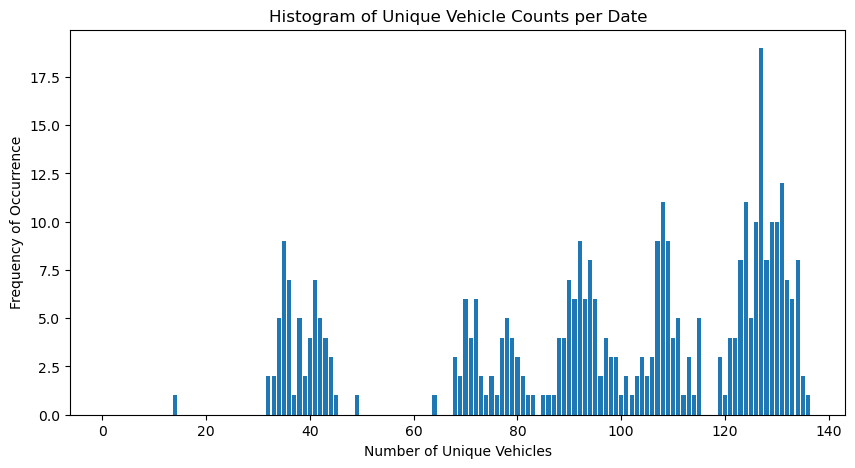

In [39]:
# Convert 'CalendarDate' to datetime if it's not already
df_model['CalendarDate'] = pd.to_datetime(df_model['CalendarDate'])

# Group by 'CalendarDate' and get unique 'Vehicle' counts per day
vehicle_counts_per_day = df_model.groupby('CalendarDate')['Vehicle'].nunique()

# Plotting the histogram of unique vehicle counts
plt.figure(figsize=(10, 5))
plt.hist(vehicle_counts_per_day, bins=range(1, vehicle_counts_per_day.max()+1), align='left', rwidth=0.8)

plt.title('Histogram of Unique Vehicle Counts per Date')
plt.xlabel('Number of Unique Vehicles')
plt.ylabel('Frequency of Occurrence')

plt.show()


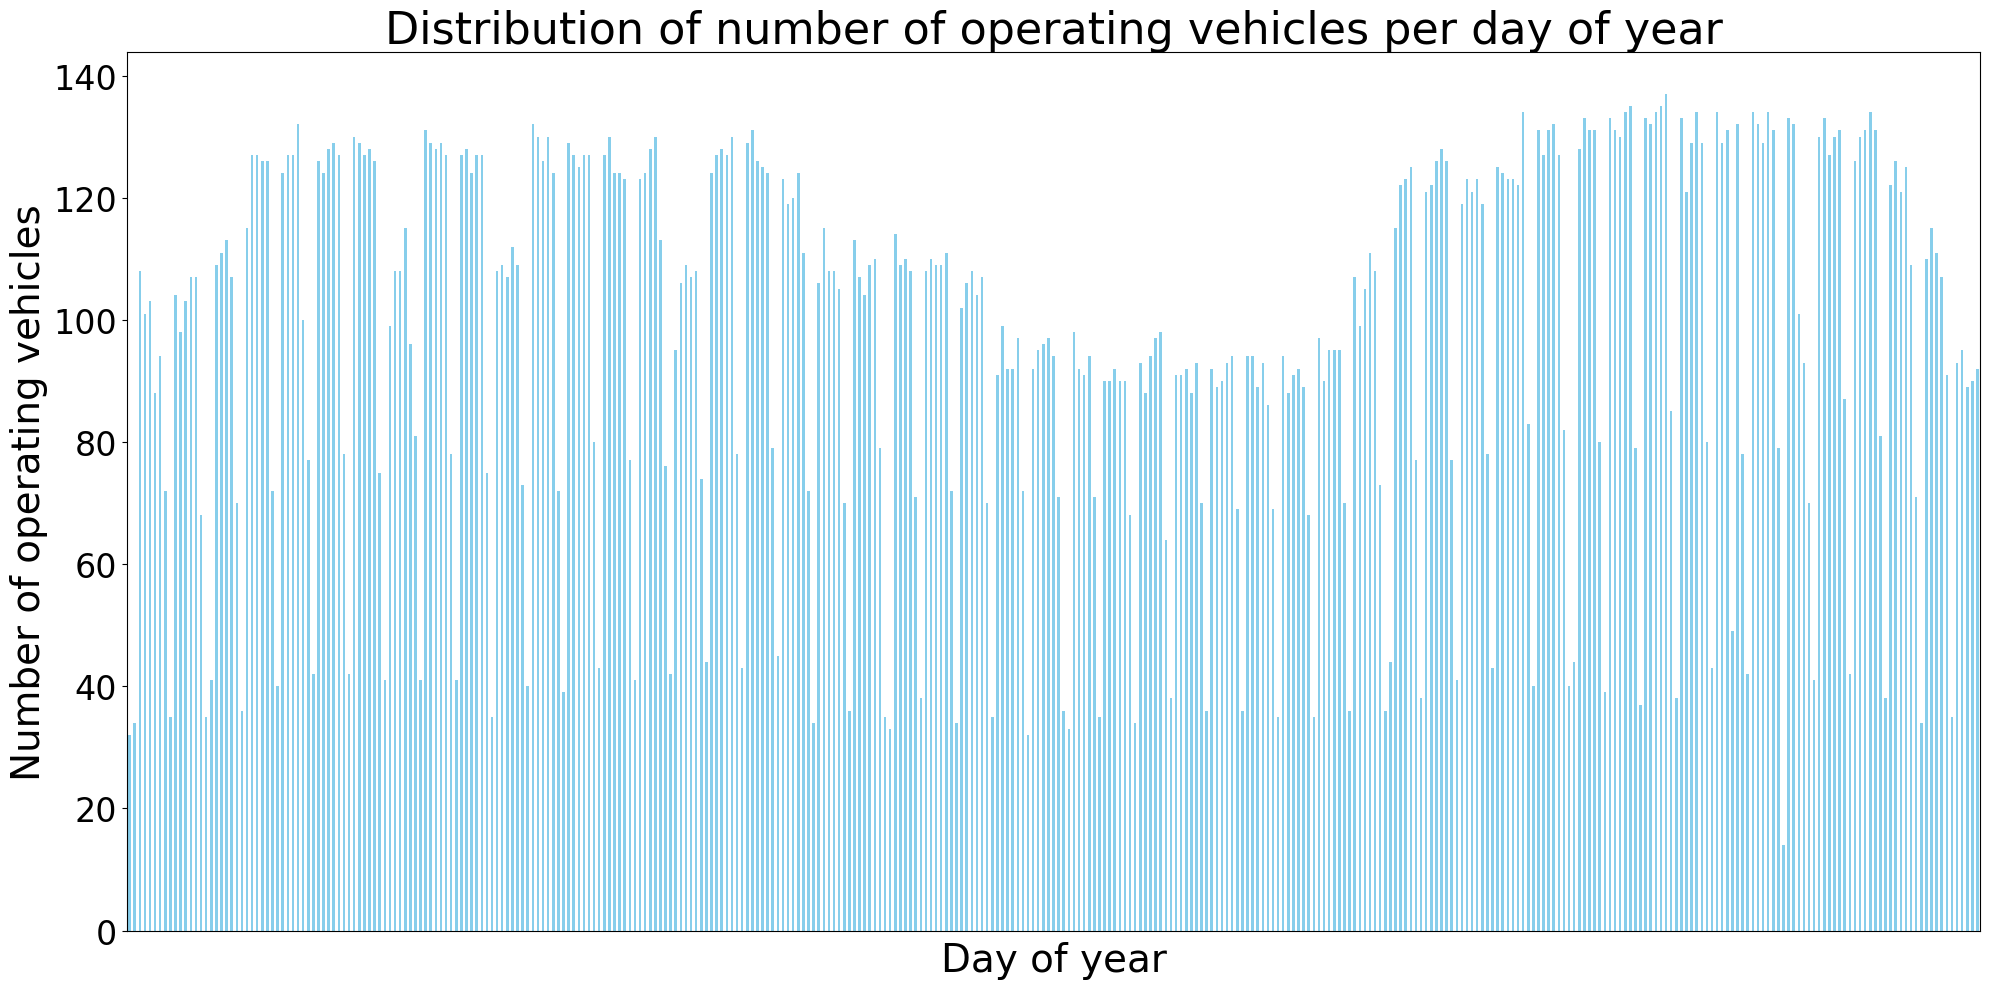

In [40]:
# Convert 'CalendarDate' to datetime if it's not already
df_model['CalendarDate'] = pd.to_datetime(df_model['CalendarDate'])

# Create a new column for day of the year
df_model['DayOfYear'] = df_model['CalendarDate'].dt.dayofyear

# Group by 'DayOfYear' and get unique 'Vehicle' counts per day
vehicle_counts_per_day = df_model.groupby('DayOfYear')['Vehicle'].nunique()

# Plotting the result
vehicle_counts_per_day.plot(kind='bar', figsize=(20, 10), color='skyblue')


plt.title('Distribution of number of operating vehicles per day of year', fontsize=32)
plt.xlabel('Day of year', fontsize=28)
plt.ylabel('Number of operating vehicles', fontsize=28)
plt.yticks(fontsize=24) 
plt.xticks([])  # Hide the x-axis labels
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
plt.show()


In [41]:
date_with_max_trips = df_model.groupby('Date')['TripKey'].nunique().idxmax()
max_trips = df_model.groupby('Date')['TripKey'].nunique().max()
print("date_with_max_trips is:", date_with_max_trips)
print("max_trips is:", max_trips)

# Filter dataframes by the day with max trips
df_model = df_model.loc[df_model['Date']==date_with_max_trips]

date_with_max_trips is: 2021-10-29
max_trips is: 2409


In [42]:
len(df_model['Vehicle'].unique())

137

In [43]:
vehicle = df_model[['Vehicle', 'Powertrain']]
vehicle = vehicle.drop_duplicates().reset_index(drop=True)
vehicle

,Vehicle,Powertrain
0,1205,conventional
1,1410,electric
2,1411,electric
3,1413,electric
4,1414,electric
...,...,...
132,7812,conventional
133,7814,conventional
134,7815,conventional
135,7901,hybrid


In [44]:
# Merging the DataFrames on the 'Vehicle' and 'Asset Name' columns
age_asset_name.set_index('Vehicle', inplace=True)
vehicle_age = pd.merge(vehicle, age_asset_name, left_on='Vehicle', right_index=True, how='left')

In [45]:
vehicle_age

,Vehicle,Powertrain,Age
0,1205,conventional,NaN
1,1410,electric,6.0
2,1411,electric,6.0
3,1413,electric,2.0
4,1414,electric,2.0
...,...,...,...
132,7812,conventional,10.0
133,7814,conventional,10.0
134,7815,conventional,10.0
135,7901,hybrid,9.0


In [46]:
vehicle_age.loc[vehicle_age['Age']>10]

,Vehicle,Powertrain,Age
8,1513,conventional,16.0
9,1515,conventional,16.0
10,1552,conventional,14.0
11,1553,conventional,14.0
12,1554,conventional,14.0
...,...,...,...
126,7660,conventional,13.0
127,7661,conventional,13.0
128,7662,conventional,13.0
129,7801,conventional,11.0


In [47]:
nan_count = vehicle_age['Age'].isna().sum()
print(nan_count)

10


In [48]:
# Filtering rows where 'vehicle_age' is NaN
nan_vehicle_age_df = vehicle_age[vehicle_age['Age'].isna()]
nan_vehicle_age_df

,Vehicle,Powertrain,Age
0,1205,conventional,NaN
6,1420,electric,NaN
7,1421,electric,NaN
63,1721,conventional,NaN
64,1722,conventional,NaN
65,1723,conventional,NaN
116,3321,conventional,NaN
117,3322,conventional,NaN
118,3323,conventional,NaN
120,5574,conventional,NaN


In [49]:
vehicle_age.to_csv(r'../../data/tidy/vehicle-age.csv', index=False)

In [50]:
median_age_by_powertrain = vehicle_age.groupby('Powertrain')['Age'].median()
median_age_by_powertrain

Powertrain
conventional    11.0
electric         2.0
hybrid          11.0
Name: Age, dtype: float64

In [51]:
mean_age_by_powertrain = vehicle_age.groupby('Powertrain')['Age'].mean()
mean_age_by_powertrain

Powertrain
conventional     9.791304
electric         3.600000
hybrid          10.142857
Name: Age, dtype: float64

median_age_CDB 11.0
median_age_HEB 11.0
median_age_BEB 2.0


C:\Users\Mahsa\AppData\Local\Temp\ipykernel_20440\1177437820.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CDB['Age'] = CDB['Age'].fillna(median_age_CDB)
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_20440\1177437820.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HEB['Age'] = HEB['Age'].fillna(median_age_HEB)
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_20440\1177437820.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

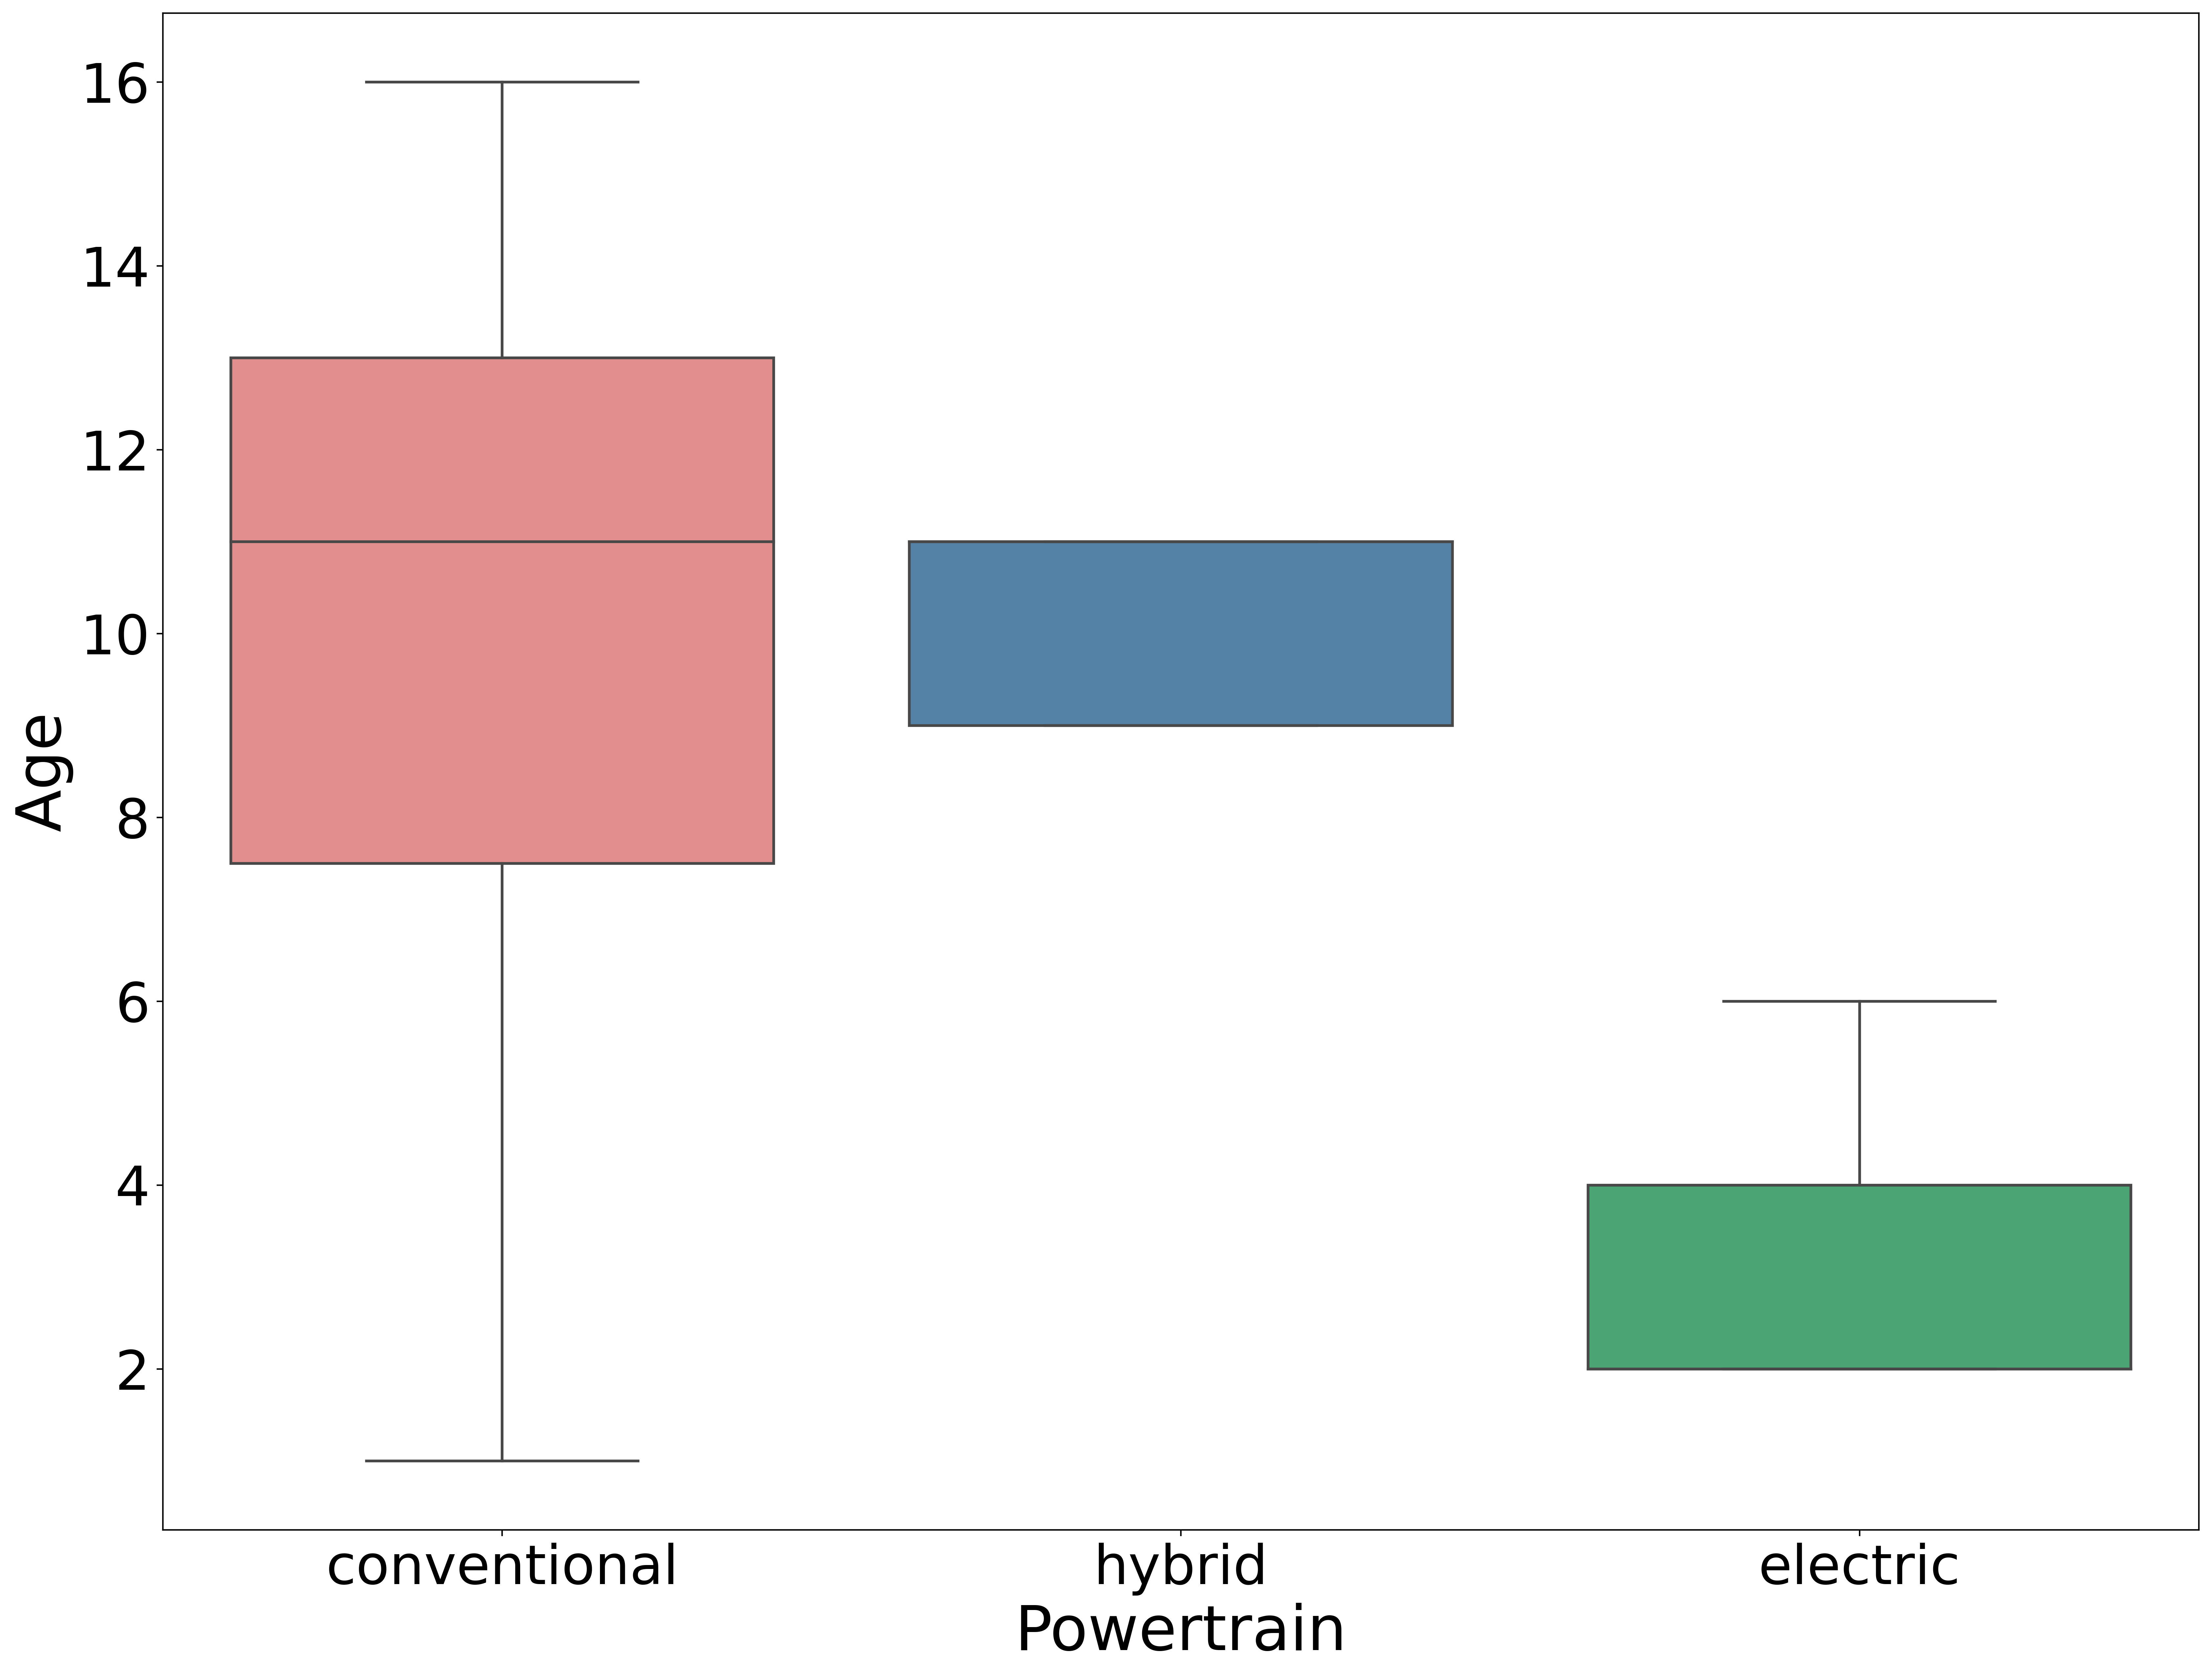

In [52]:
data = vehicle_age

# Impute missing values in the "Age" column with the median age
CDB=data.loc[data['Powertrain']=='conventional']
HEB=data.loc[data['Powertrain']=='hybrid']
BEB=data.loc[data['Powertrain']=='electric']
median_age_CDB = CDB['Age'].median()
print('median_age_CDB',median_age_CDB)
median_age_HEB = HEB['Age'].median()
print('median_age_HEB',median_age_HEB)
median_age_BEB = BEB['Age'].median()
print('median_age_BEB',median_age_BEB)
CDB['Age'] = CDB['Age'].fillna(median_age_CDB)
HEB['Age'] = HEB['Age'].fillna(median_age_HEB)
BEB['Age'] = BEB['Age'].fillna(median_age_BEB)
data = pd.concat([CDB, HEB, BEB])
data = data.reset_index(drop=True)

# Define a color palette
palette = {
    'conventional': 'lightcoral',
    'hybrid': 'steelblue',
    'electric': 'mediumseagreen'
}

# Create a box plot
plt.figure(figsize=(20, 15), dpi=400)
sns.boxplot(x='Powertrain', y='Age', data=data, palette=palette)
#plt.title('Distribution of Bus Ages Across Different Powertrains')
plt.xlabel('Powertrain', fontsize=34)
plt.ylabel('Age', fontsize=34)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()


In [73]:
# Compute mean age per unique powertrain
mean_age_per_powertrain = vehicle_age.groupby('Powertrain')['Age'].mean()
print(mean_age_per_powertrain)

Powertrain
conventional     9.739837
electric         5.142857
hybrid          10.142857
Name: Age, dtype: float64


In [74]:
# Load the dataset
data = vehicle_age

# Impute missing values in the "Age" column with the median age
median_age = data['Age'].median()
print('median_age',median_age)
data['Age'] = data['Age'].fillna(median_age-2)

# Calculate the replacement year for each bus (considering useful life of 15 years for buses)
data['Replacement Year'] = 2022 + (15 - data['Age'])

# Initialize an empty dataframe to store the replacement plan
replacement_plan = pd.DataFrame(index=range(2022, 2036))
replacement_plan.index.name = 'Year'

# For each powertrain type, count the number of buses to be replaced each year from 2022 to 2035
for powertrain in data['Powertrain'].unique():
    replacement_counts = data[data['Powertrain'] == powertrain]['Replacement Year'].value_counts().sort_index()
    replacement_counts = replacement_counts.reindex(range(2022, 2036), fill_value=0).astype(int)
    replacement_plan[powertrain] = replacement_counts

# Reset index to have "Year" as a column instead of index
replacement_plan = replacement_plan.reset_index()

replacement_plan

median_age 11.0


,Year,conventional,electric,hybrid
0,2022,2,0,0
1,2023,21,0,0
2,2024,5,0,0
3,2025,21,0,0
4,2026,13,0,4
5,2027,8,0,0
6,2028,8,2,3
7,2029,9,0,0
8,2030,9,0,0
9,2031,0,2,0


In [75]:
## Sandra said 14 CDBS replaced in 2022. So we need to find 14 oldest buses and replace their age with 0
sandra_replaced_2022=14
actual_2022_replacement = replacement_plan.loc[replacement_plan['Year'] == 2022, 'conventional'].values[0]
actual_2023_replacement = replacement_plan.loc[replacement_plan['Year'] == 2023, 'conventional'].values[0]

replacement_plan.loc[replacement_plan['Year'] == 2022, 'conventional'] = 0
replacement_plan.loc[replacement_plan['Year'] == 2023, 'conventional'] = actual_2022_replacement+actual_2023_replacement-sandra_replaced_2022
replacement_plan

,Year,conventional,electric,hybrid
0,2022,0,0,0
1,2023,9,0,0
2,2024,5,0,0
3,2025,21,0,0
4,2026,13,0,4
5,2027,8,0,0
6,2028,8,2,3
7,2029,9,0,0
8,2030,9,0,0
9,2031,0,2,0


In [76]:
replacement_plan.to_csv(r'../../data/tidy/replacement_plan.csv', index=False)

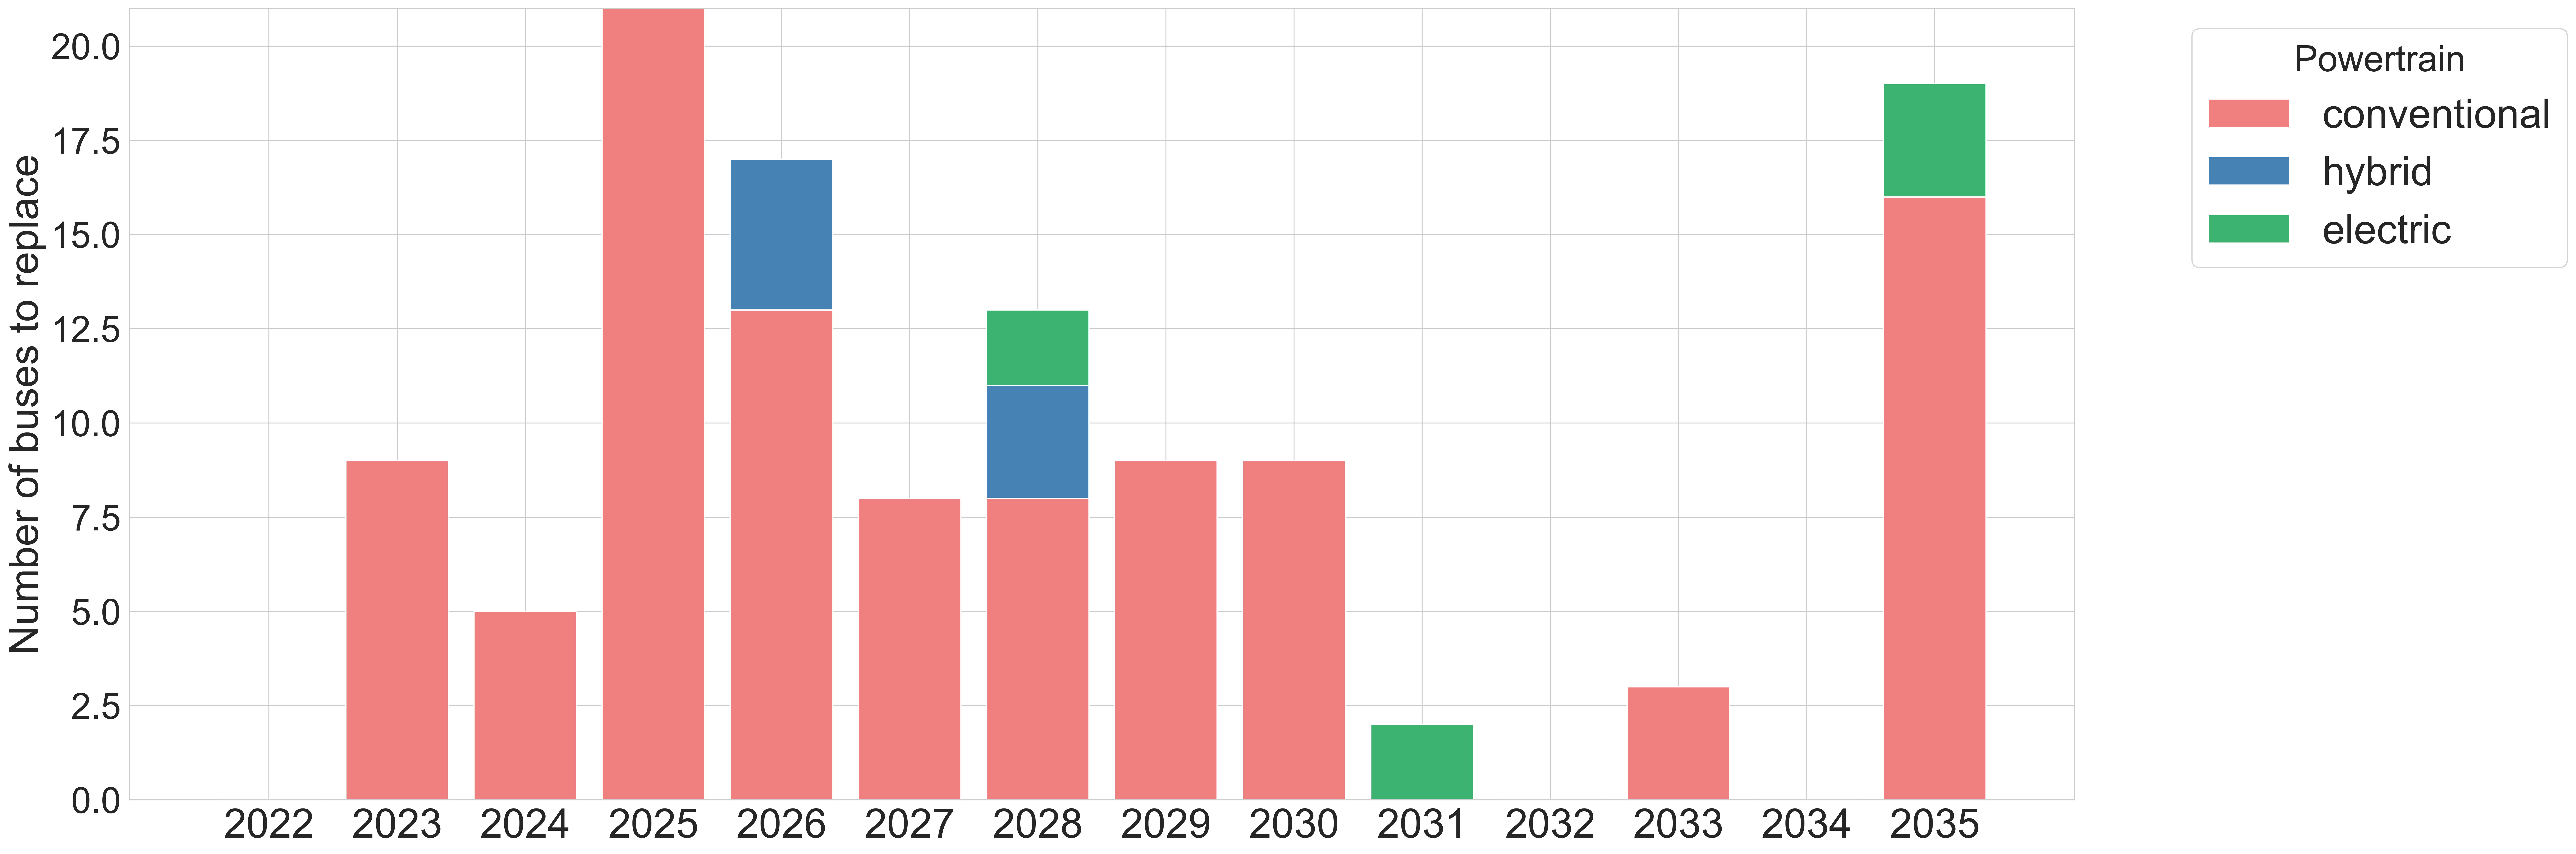

In [77]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a stacked bar plot
plt.figure(figsize=(30, 10), dpi=400)
bottom = None
for powertrain in palette.keys():
    plt.bar(replacement_plan['Year'], replacement_plan[powertrain], bottom=bottom, label=powertrain, color=palette[powertrain])
    if bottom is None:
        bottom = replacement_plan[powertrain]
    else:
        bottom += replacement_plan[powertrain]

#plt.title('Bus Replacement Plan (2022 - 2035)', fontsize=16)
#plt.xlabel('Year', fontsize=30)
plt.ylabel('Number of buses to replace', fontsize=34)
plt.xticks(replacement_plan['Year'], fontsize=34)
plt.yticks(fontsize=30)
plt.legend(title='Powertrain', bbox_to_anchor=(1.05, 1), fontsize=34,  title_fontsize=30)
plt.tight_layout()
plt.show()
